# Cholesky decomposition

| Who  | Mail | Date | What |
| ---  | ---   | --- | ---      |
|Diego Andrés Alvarez Marín | <daalvarez@unal.edu.co>  | May 18th, 2025 | Initial code |

The Cholesky decomposition is a method for efficiently solving linear systems when the coefficient matrix is symmetric positive definite. For a symmetric positive definite matrix $\boldsymbol{A}$, the Cholesky decomposition gives us:

$$\boldsymbol{A} = \boldsymbol{L}\boldsymbol{L}^T$$

where $\boldsymbol{L}$ is a lower triangular matrix with positive diagonal entries.

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
from numpy.linalg import norm
from numpy.random import rand
import matplotlib.pyplot as plt
from scipy.linalg import issymmetric, solve
import time

# Increase the number of digits shown when an array is printed
np.set_printoptions(linewidth=200)

## 1. Mathematical Background

Let $\boldsymbol{A}$ be an $n \times n$ real, symmetric, positive-definite matrix. We want to find a lower triangular matrix $\boldsymbol{L}$ such that $\boldsymbol{A} = \boldsymbol{L}\boldsymbol{L}^T$. The algorithm proceeds by computing the entries of $\boldsymbol{L}$ column by column (or row by row).

For $j = 1, 2, \dots, n$:

1.  Compute the diagonal element $l_{jj}$:
    $$l_{jj} = \sqrt{a_{jj} - \sum_{k=1}^{j-1} l_{jk}^2}$$

2.  Compute the off-diagonal elements in the  $j$-th column $(i > j)$:
    $$l_{ij} = \frac{1}{l_{jj}} \left( a_{ij} - \sum_{k=1}^{j-1} l_{ik} l_{jk} \right) \quad \text{for } i = j+1, j+2, \dots, n$$

## 2. Implementation of the Gauss-Jordan elimination method

In [2]:
def cholesky_decomposition(A):
    """
    Compute the Cholesky decomposition of a symmetric positive definite matrix.
    
    Parameters:
    A (numpy.ndarray): A symmetric positive definite matrix
    
    Returns:
    L (numpy.ndarray): Lower triangular matrix such that A = L@L.T

    Raises:
    ValueError: If matrix is not symmetric or not positive definite
    """
    n = A.shape[0]
    
    # Check if the matrix is symmetric
    if not issymmetric(A):
        raise ValueError("Matrix must be symmetric")
    
    # Initialize L as a zero matrix
    L = np.zeros((n, n))
    
    # Compute L column by column
    for j in range(n):
        # Compute diagonal element
        Ljj2 = A[j, j] - np.sum(L[j, :j]**2)

        # Check if the matrix is positive definite
        if Ljj2 <= 0:
            raise ValueError("Matrix is not positive definite")
        
        L[j, j] = np.sqrt(Ljj2)
        
        # Compute lower off-diagonal elements
        for i in range(j+1, n):
            L[i, j] = (A[i, j] - np.sum(L[i, :j] * L[j, :j]))/L[j, j]
            
    return L

## 3. Example

Let's test our implementation with a simple example:

### Test 1: Positive definite matrix

In [3]:
# Create a symmetric positive definite matrix
n = 4
A_random = rand(n, n)
A = A_random @ A_random.T  # This ensures the matrix is symmetric positive definite

print("Original matrix A:")
print(A)

print("\nVerify A is symmetric:", issymmetric(A))

# Compute Cholesky decomposition
try:
    L = cholesky_decomposition(A)
    print("\nComputed L:")
    print(L)    

    # Verify the decomposition
    print("\nVerify A = L@L.T:", np.allclose(A, L@L.T))
except ValueError as error:
    print(f"Error: {error}")

Original matrix A:
[[0.98942822 0.11339217 0.50249214 1.26277893]
 [0.11339217 0.02155458 0.09118211 0.16665663]
 [0.50249214 0.09118211 0.73297661 1.10531925]
 [1.26277893 0.16665663 1.10531925 2.25818022]]

Verify A is symmetric: True

Computed L:
[[0.99470007 0.         0.         0.        ]
 [0.11399635 0.0925171  0.         0.        ]
 [0.50516951 0.36311808 0.58815443 0.        ]
 [1.26950724 0.23711767 0.64252035 0.42127711]]

Verify A = L@L.T: True


### Test 2: Non-positive definite matrix

In [4]:
A_npd = A.copy()
A_npd[0,0] *= -1  # Negative diagonal element

print("Original matrix A:")
print(A_npd)

print("\nVerify A is symmetric:", issymmetric(A_npd))

# Compute Cholesky decomposition
try:
    L = cholesky_decomposition(A_npd)
    print("\nComputed L:")
    print(L)    

    # Verify the decomposition
    print("\nVerify A = L@L.T:", np.allclose(A_npd, L@L.T))
except ValueError as error:
    print(f"Error: {error}")

Original matrix A:
[[-0.98942822  0.11339217  0.50249214  1.26277893]
 [ 0.11339217  0.02155458  0.09118211  0.16665663]
 [ 0.50249214  0.09118211  0.73297661  1.10531925]
 [ 1.26277893  0.16665663  1.10531925  2.25818022]]

Verify A is symmetric: True
Error: Matrix is not positive definite


Using our function `cholesky_decomposition()` we can create another function to check if a matrix is positive definite

In [5]:
def is_positive_definite(A):
    """
    Check if a matrix is positive definite using the Cholesky decomposition.
    
    Parameters:
    A (numpy.ndarray): A symmetric matrix
    
    Returns:
    bool: True if the matrix is positive definite, False otherwise
    """
    try:
        cholesky_decomposition(A)
        return True
    except ValueError:
        return False

In [6]:
print("Original matrix A:")
print(A)

print("\nVerify A is positive definite matrix:", is_positive_definite(A))

# Let's also check using NumPy's eigenvalues
eigenvalues = np.linalg.eigvalsh(A)
print(f"\nmin eigenvalue = {min(eigenvalues):.6f}")

Original matrix A:
[[0.98942822 0.11339217 0.50249214 1.26277893]
 [0.11339217 0.02155458 0.09118211 0.16665663]
 [0.50249214 0.09118211 0.73297661 1.10531925]
 [1.26277893 0.16665663 1.10531925 2.25818022]]

Verify A is positive definite matrix: True

min eigenvalue = 0.005423


## 4. Comparison with NumPy's Implementation

Now, let's compare our implementation with NumPy's built-in function:

In [7]:
# NumPy's implementation
L_numpy = np.linalg.cholesky(A)

print("NumPy's L:")
print(L_numpy)

print("\nIs our implementation close to NumPy's?", np.allclose(L, L_numpy))

NumPy's L:
[[0.99470007 0.         0.         0.        ]
 [0.11399635 0.0925171  0.         0.        ]
 [0.50516951 0.36311808 0.58815443 0.        ]
 [1.26950724 0.23711767 0.64252035 0.42127711]]

Is our implementation close to NumPy's? True


## 5. Solving Linear Systems Using Cholesky Decomposition

One of the main applications of the Cholesky decomposition is solving linear systems of the form $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$, where $\boldsymbol{A}$ is symmetric positive definite.

Given $\boldsymbol{A} = \boldsymbol{L}\boldsymbol{L}^T$, we can solve $\boldsymbol{A}\boldsymbol{x} = \boldsymbol{b}$ by:

1.  **Forward Substitution:** Solve the lower triangular system $\boldsymbol{Ly} = \boldsymbol{b}$ for the vector $\boldsymbol{y}$.
2.  **Backward Substitution:** Solve the upper triangular system $\boldsymbol{L}^T \boldsymbol{x} = \boldsymbol{y}$ for the vector $\boldsymbol{x}$, which is the solution to the original system.

$\textbf{1. Forward Substitution } (\boldsymbol{Ly} = \boldsymbol{b})$

Since $\boldsymbol{L}$ is a lower triangular matrix:

$$\begin{pmatrix}
l_{11} & 0 & 0 & \dots & 0 \\
l_{21} & l_{22} & 0 & \dots & 0 \\
l_{31} & l_{32} & l_{33} & \dots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
l_{n1} & l_{n2} & l_{n3} & \dots & l_{nn}
\end{pmatrix}
\begin{pmatrix}
y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\ b_2 \\ b_3 \\ \vdots \\ b_n
\end{pmatrix}$$

We can solve for the components of $\boldsymbol{y}$ iteratively, starting from the first equation:

* From the first row: $l_{11} y_1 = b_1 \implies y_1 = \frac{b_1}{l_{11}}$
* From the second row: $l_{21} y_1 + l_{22} y_2 = b_2 \implies y_2 = \frac{b_2 - l_{21} y_1}{l_{22}}$
* From the third row: $l_{31} y_1 + l_{32} y_2 + l_{33} y_3 = b_3 \implies y_3 = \frac{b_3 - l_{31} y_1 - l_{32} y_2}{l_{33}}$
* In general, for $i = 1, 2, \dots, n$:
    $$y_i = \frac{b_i - \sum_{j=1}^{i-1} l_{ij} y_j}{l_{ii}}$$

$\textbf{2. Backward Substitution } (\boldsymbol{L}^T \boldsymbol{x} = \boldsymbol{y})$

Since $\boldsymbol{L}^T$ is an upper triangular matrix:

$$\begin{pmatrix}
l_{11} & l_{21} & l_{31} & \dots & l_{n1} \\
0 & l_{22} & l_{32} & \dots & l_{n2} \\
0 & 0 & l_{33} & \dots & l_{n3} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \dots & l_{nn}
\end{pmatrix}
\begin{pmatrix}
x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n
\end{pmatrix}
=
\begin{pmatrix}
y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n
\end{pmatrix}$$

We can solve for the components of $\boldsymbol{x}$ iteratively, starting from the last equation:

* From the last row: $l_{nn} x_n = y_n \implies x_n = \frac{y_n}{l_{nn}}$
* From the second to last row: $l_{n-1, n-1} x_{n-1} + l_{n, n-1} x_n = y_{n-1} \implies x_{n-1} = \frac{y_{n-1} - l_{n, n-1} x_n}{l_{n-1, n-1}}$
* From the third to last row: $l_{n-2, n-2} x_{n-2} + l_{n-1, n-2} x_{n-1} + l_{n, n-2} x_n = y_{n-2} \implies x_{n-2} = \frac{y_{n-2} - l_{n-1, n-2} x_{n-1} - l_{n, n-2} x_n}{l_{n-2, n-2}}$
* In general, for $i = n, n-1, \dots, 1$:
    $$x_i = \frac{y_i - \sum_{j=i+1}^{n} l_{ji} x_j}{l_{ii}}$$


Let's implement this:

In [8]:
def solve_using_cholesky(A, b):
    """
    Solve the linear system Ax = b using Cholesky decomposition.
    
    Parameters:
    A (numpy.ndarray): Symmetric positive definite matrix
    b (numpy.ndarray): Right-hand side vector
    
    Returns:
    x (numpy.ndarray): Solution vector
    """
    # Compute the Cholesky decomposition
    L = cholesky_decomposition(A)
    
    # Solve Ly = b for y (forward substitution)
    n = A.shape[0]
    y = np.zeros(n)
    for i in range(n):
        y[i] = (b[i] - np.sum(L[i, :i]*y[:i]))/L[i, i]
    
    # Solve L^Tx = y for x (backward substitution)
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(L[i+1:, i]*x[i+1:]))/L[i, i]
    
    return x

Let's test our solver with a simple example

In [9]:
# Create a random right-hand side vector
b = rand(n)

# Solve the system using our implementation
x_our = solve_using_cholesky(A, b)

# Solve the system using SciPy, taking advantage that A is a positive definite matrix
x_scipy = solve(A, b, assume_a='pos')

print("Our solution x:")
print(x_our)
print("\nNumPy's solution x:")
print(x_scipy)
print("\nIs our solution close to SciPy's?", np.allclose(x_our, x_scipy))

# Verify the solution
print("\nVerify A@x = b:", np.allclose(A@x_our, b))

Our solution x:
[-16.18377095 133.70427887 -15.76993104   7.00773395]

NumPy's solution x:
[-16.18377095 133.70427887 -15.76993104   7.00773395]

Is our solution close to SciPy's? True

Verify A@x = b: True


## 6. Large System Performance

Now, let's compare the performance of our implementation with NumPy's for matrices of different sizes:

In [10]:
def compare_performance(sizes):
    """
    Compare performance of our implementation versus NumPy for different matrix sizes.
    """
    
    num_sizes = len(sizes)

    # Separate memory
    ch_times     = np.zeros(num_sizes)
    np_times     = np.zeros(num_sizes)
    ch_residuals = np.zeros(num_sizes)
    np_residuals = np.zeros(num_sizes)

    # Create a seed for reproducibility
    np.random.seed(42)
    
    for i in range(num_sizes):
        # Matrix size
        n = sizes[i]
        
        # Create a random symmetric positive definite matrix
        # Create lower triangular matrix with random values below diagonal
        L = np.tril(np.random.randn(n, n), -1)
    
        # Ensure positive diagonal entries (crucial for positive definiteness)
        np.fill_diagonal(L, np.abs(np.random.randn(n)) + 100)
    
        # Compute positive definite matrix
        A = L@L.T
        
        # Time our implementation
        start = time.perf_counter()            
        L_our = cholesky_decomposition(A)
        ch_times[i] = time.perf_counter() - start
        
        # Time NumPy's implementation
        start = time.perf_counter()
        L_numpy = np.linalg.cholesky(A)
        np_times[i] = time.perf_counter() - start

    # Pack all stats in a pandas' dataframe
    df = pd.DataFrame({
        'Size':            sizes,
        'Our time':        ch_times,
        'NumPy time':      np_times
    })
    return df

In [11]:
# Compare performance for matrices of different sizes
print("\n\nPerformance Comparison:")
sizes = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
df = compare_performance(sizes)
display(df)



Performance Comparison:


,Size,Our time,NumPy time
0,10,0.000529,0.000052
1,20,0.001499,0.000084
2,50,0.008699,0.000127
3,100,0.034621,0.000294
4,200,0.083092,0.001250
5,500,0.549869,0.003284
6,1000,2.286092,0.013994
7,2000,10.497291,0.081373
8,5000,90.953983,0.868226


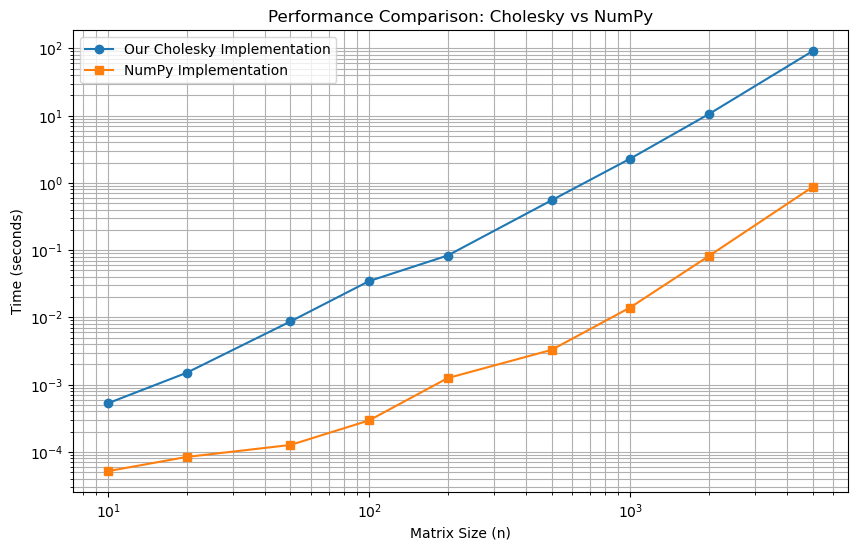

In [12]:
# Plot the performance comparison
ch_times = df['Our time']
np_times = df['NumPy time']

plt.figure(figsize=(10, 6))
plt.loglog(sizes, ch_times, 'o-', label='Our Cholesky Implementation')
plt.loglog(sizes, np_times, 's-', label='NumPy Implementation')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Cholesky vs NumPy')
plt.legend()
plt.grid(True, which="both")
#k, log_a = np.polyfit(np.log(sizes[4:]), np.log(ch_times[4:]), 1)
#plt.plot(sizes, np.exp(log_a)*sizes**k)
plt.show()

When data follows a straight line in a log-log plot, it indicates that the relationship between the two variables adheres to a *power law*. Specifically, the data can be modeled by an equation of the form 
$$y = ax^k.$$
To show that, take the logarithm of both sides of the power law equation transforms it into:
$$
   \log(y) = \log(a) + k\log(x).
$$
This is a linear equation where $k$ is the slope of the line and $\log(a)$ is the intercept.

In [13]:
k, log_a = np.polyfit(np.log(sizes[4:]), np.log(ch_times[4:]), 1)
print("k =", k)
print("a =", np.exp(log_a))

k = 2.166792091387427
a = 7.932064138969218e-07


The computational complexity of the Cholesky decomposition is $O(n^3/3)$ for an $n \times n$ matrix, which is about 3 times faster than LU decomposition.

## 7. Application: Solving a Poisson Equation

Let's apply the Cholesky decomposition to solve a Poisson equation, which is a common application in numerical methods.

The 1D Poisson equation is given by:

$\frac{d^2 u}{dx^2} = f(x)$

With boundary conditions $u(0) = u(1) = 0$.

Using finite differences, we get a system of linear equations $Au = f$ where $A$ is a tridiagonal matrix, which is symmetric positive definite.

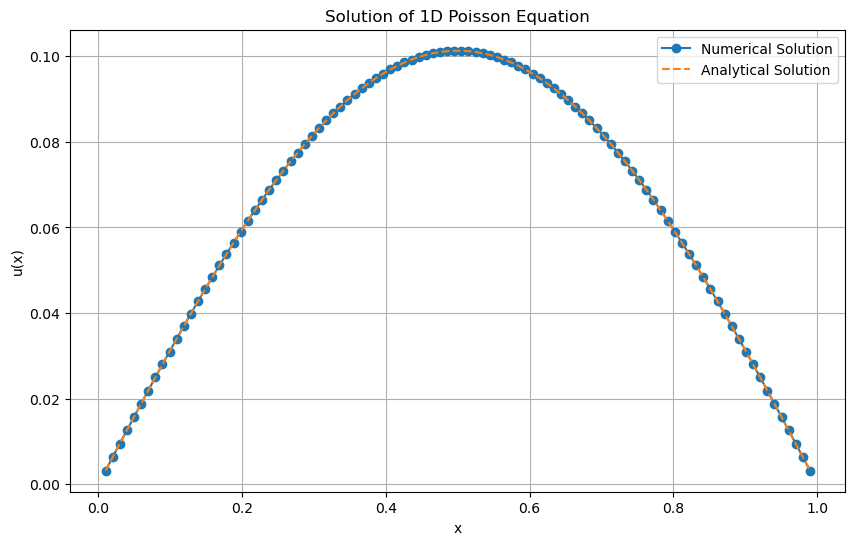

Maximum error: 8.168541e-06


In [14]:
def solve_poisson_1d(n, f):
    """
    Solve the 1D Poisson equation using finite differences and Cholesky decomposition.
    
    Parameters:
    n (int): Number of interior grid points
    f (function): Right-hand side function
    
    Returns:
    x (numpy.ndarray): Grid points
    u (numpy.ndarray): Solution
    """
    # Create grid
    h = 1.0/(n + 1)
    x = np.linspace(h, 1-h, n)
    
    # Create system matrix A
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2
        if i > 0:
            A[i, i-1] = -1
        if i < n-1:
            A[i, i+1] = -1
    A = A / h**2
    
    # Create right-hand side vector
    b = np.array([f(xi) for xi in x])
    
    # Solve using Cholesky decomposition
    u = solve_using_cholesky(A, b)
    
    return x, u

# Define the right-hand side function
def f(x):
    return np.sin(np.pi * x)

# Solve the Poisson equation
n = 100
x, u = solve_poisson_1d(n, f)

# Analytical solution
u_analytical = np.sin(np.pi * x) / (np.pi**2)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, u, 'o-', label='Numerical Solution')
plt.plot(x, u_analytical, '--', label='Analytical Solution')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Solution of 1D Poisson Equation')
plt.legend()
plt.grid(True)
plt.show()

# Compute and print the error
error = np.max(np.abs(u - u_analytical))
print(f"Maximum error: {error:.6e}")